In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from astropy.table import Table
from astropy.io import fits
from astropy.time import Time
from Dipper_Project_Functions import plotparams
from Dipper_Project_Functions import custom_id
from Dipper_Project_Functions import read_lightcurve_csv
from Dipper_Project_Functions import plot_light_curve
import scipy
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.timeseries import LombScargle as ls
import heapq

In [2]:
asassn_id = 455267102087		
ra_val = 277.96999
dec_val = -28.80754

target_id = custom_id(ra_val,dec_val)
print(target_id)

J183153$-$284827


In [3]:
dfv, dfg = read_lightcurve_csv(asassn_id, 'Updated_LC_Data/')
dfg = dfg.loc[dfg.Mag < 20].reset_index(drop=True)

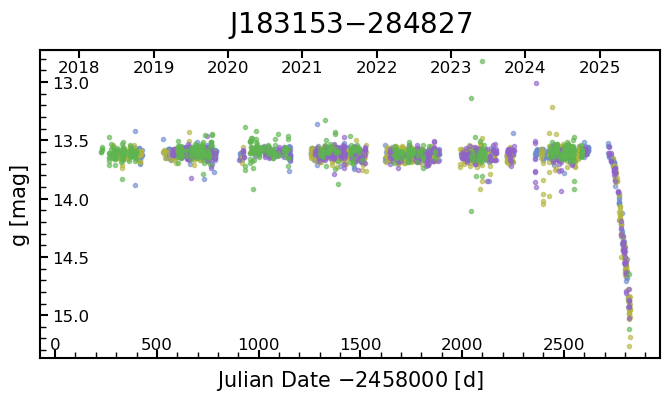

In [4]:
plot_light_curve(dfg, ra_val, dec_val, peak_option=False)

In [5]:
Tess_df = Table(fits.open('MAST_2025-06-16T1820/TESS/tess2021039152502-s0035-0000000030569481-0205-s/tess2021039152502-s0035-0000000030569481-0205-s_lc.fits')[1].data).to_pandas()

In [6]:
print('Length of dataframe:', len(Tess_df))
print('Columns:', list(Tess_df.columns))

Length of dataframe: 17997
Columns: ['TIME', 'TIMECORR', 'CADENCENO', 'SAP_FLUX', 'SAP_FLUX_ERR', 'SAP_BKG', 'SAP_BKG_ERR', 'PDCSAP_FLUX', 'PDCSAP_FLUX_ERR', 'QUALITY', 'PSF_CENTR1', 'PSF_CENTR1_ERR', 'PSF_CENTR2', 'PSF_CENTR2_ERR', 'MOM_CENTR1', 'MOM_CENTR1_ERR', 'MOM_CENTR2', 'MOM_CENTR2_ERR', 'POS_CORR1', 'POS_CORR2']


In [7]:
Tess_df.head(10)

,TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
0,2254.987233,0.00302,739821,NaN,NaN,NaN,NaN,NaN,NaN,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2254.988621,0.00302,739822,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2254.990010,0.00302,739823,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2254.991399,0.00302,739824,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2254.992788,0.00302,739825,34667.007812,32.231678,32239.208984,16.650826,NaN,NaN,4096,NaN,NaN,NaN,NaN,1726.631517,0.000760,480.677962,0.000945,-0.035772,0.130824
5,2254.994177,0.00302,739826,34555.500000,32.245544,32339.388672,16.674641,NaN,NaN,4096,NaN,NaN,NaN,NaN,1726.632046,0.000762,480.678914,0.000948,-0.036766,0.131495
6,2254.995566,0.00302,739827,34593.808594,32.266380,32399.527344,16.691484,NaN,NaN,4096,NaN,NaN,NaN,NaN,1726.630594,0.000761,480.674226,0.000949,-0.038619,0.125170
7,2254.996955,0.00302,739828,34769.359375,32.315067,32441.429688,16.706816,NaN,NaN,4096,NaN,NaN,NaN,NaN,1726.629855,0.000759,480.680839,0.000945,-0.039589,0.133618
8,2254.998344,0.00302,739829,34627.312500,32.306896,32520.402344,16.713682,NaN,NaN,4096,NaN,NaN,NaN,NaN,1726.629649,0.000762,480.676361,0.000949,-0.038649,0.129498
9,2254.999733,0.00302,739830,34650.609375,32.341198,32617.929688,16.743605,NaN,NaN,4096,NaN,NaN,NaN,NaN,1726.632467,0.000762,480.678131,0.000948,-0.035390,0.131855


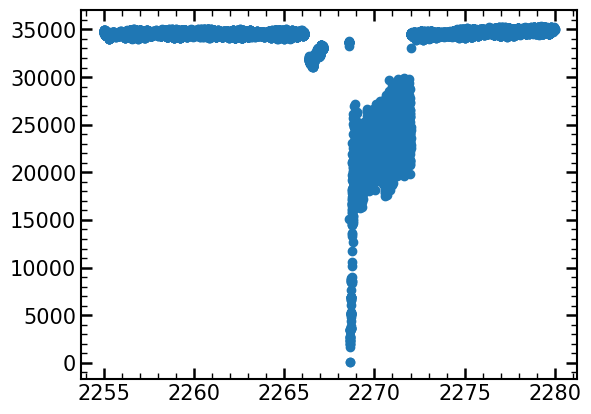

In [8]:
fig, ax = plt.subplots(1,1)
ax = plotparams(ax)

Tess_df.SAP_FLUX.dropna()

ax.scatter(Tess_df.TIME, Tess_df.SAP_FLUX)
